# Euro Data Cube - Xcube Validation
## Test 3 xcube Time-series
This validation test demonstrates the following features: 
* Time-series capbilites:
    * list time stamps for variable
    * compute time-series for point
    * compute time-series for geometry
   

## Requirements

To run this notebook you need your [Sentinel Hub API authentication](https://docs.sentinel-hub.com/api/latest/#/API/authentication) information and a Python environment
with `xcube` and the xcube plugin `xcube_sh` installed.

Checkout [xcube sources](https://github.com/dcs4cop/xcube) and follow instructions in its [README.md](https://github.com/dcs4cop/xcube/blob/master/README.md).

After activating the `xcube` Python environment, install additional packages required for Sentinel Hub API authentication:

```bash
$ conda activate xcube
(xcube) $ conda install -c conda-forge oauthlib
(xcube) $ pip install requests_oauthlib
```

Then checkout [xcube_sh sources](https://gitext.sinergise.com/dcfs/xcube-dcfs.git) and follow instructions in its [README.md](https://gitext.sinergise.com/dcfs/xcube-dcfs/blob/master/README.md).

Your Sentinel Hub API credentials can be passed as keyword arguments to the `SentinelHub` constructor (see below) or passed as environment variables (preferred): 

```bash
(xcube) $ export SH_CLIENT_ID=<your-id>
(xcube) $ export SH_CLIENT_SECRET=<your-secret>
```


In [65]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
from xcube.core.geom import clip_dataset_by_geometry
import matplotlib.pyplot as plt

ImportError: DLL load failed: The specified module could not be found.

In [69]:
import gdal

ImportError: DLL load failed: The specified module could not be found.

In [25]:
x1 = 10.07  # degree
y1 = 54.20  # degree
x2 = 10.2  # degree
y2 = 54.30  # degree

bbox = x1, y1, x2, y2

In [26]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [27]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['B04'],
                         chunk_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-01-01', '2019-12-31'],
                         time_tolerance='30M')  

In [60]:
cube = open_cube(cube_config)

## List time stamps vor observations

In [53]:
cube.time.data

array(['2018-01-03T10:44:24.000000000', '2018-01-05T10:34:19.000000000',
       '2018-01-08T10:44:15.000000000', '2018-01-10T10:34:07.000000000',
       '2018-01-13T10:44:03.000000000', '2018-01-15T10:34:54.000000000',
       '2018-01-18T10:45:24.000000000', '2018-01-20T10:33:35.000000000',
       '2018-01-23T10:43:26.000000000', '2018-01-25T10:34:42.000000000',
       '2018-01-28T10:43:05.000000000', '2018-01-30T10:35:17.000000000',
       '2018-02-02T10:42:38.000000000', '2018-02-04T10:35:32.000000000',
       '2018-02-07T10:42:12.000000000', '2018-02-09T10:31:52.000000000',
       '2018-02-12T10:41:37.000000000', '2018-02-14T10:31:25.000000000',
       '2018-02-17T10:41:52.000000000', '2018-02-19T10:30:46.000000000',
       '2018-02-22T10:40:35.000000000', '2018-02-24T10:30:18.000000000',
       '2018-02-27T10:42:36.000000000', '2018-03-01T10:30:13.000000000',
       '2018-03-04T10:44:07.000000000', '2018-03-06T10:32:21.000000000',
       '2018-03-09T10:40:22.000000000', '2018-03-16

## Get time-series for point, nearest neigbhour and spatially interpolated

In [40]:
fig = plt.figure()

<Figure size 720x2160 with 0 Axes>

In [41]:
ax = fig.add_subplot()

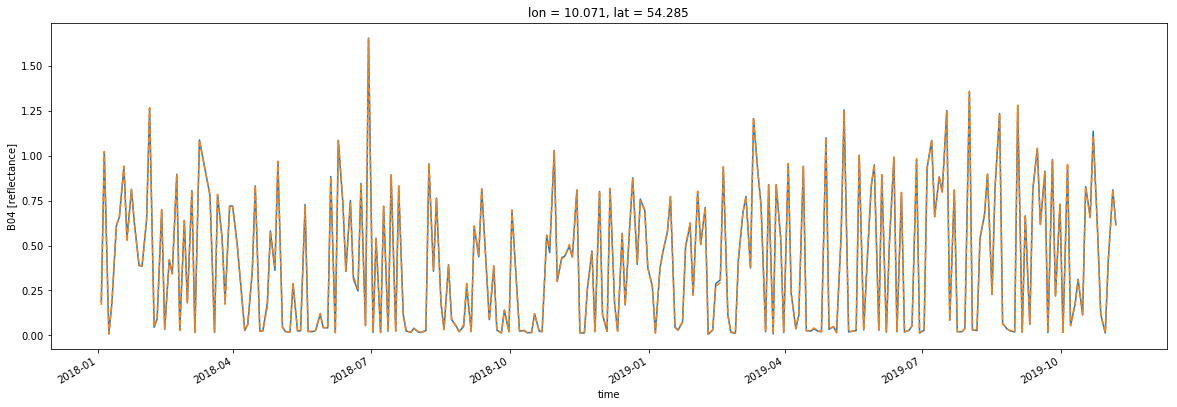

In [62]:
cube.B04.sel(lon=10.071, lat=54.285, method='nearest').plot.line(ax=ax,figsize=[20,6])
cube.B04.interp(lon=10.071,lat=54.285, method='linear').plot.line(ax=ax, linestyle='--')

## Time-series for geometry

In [205]:
SH.band_names('S2L1C')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B10',
 'B11',
 'B12',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles']

In [206]:
cube_config = CubeConfig(dataset_name='S2L1C',
                         band_names=['B04'],
                         chunk_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

In [207]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 5632, time: 46)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2018-05-15T10:30:24 ... 2018-07-31T10:20:24
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(46, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L1C Data Cube Subset
    history:                 [{'program': 'xcube_sh.store.SentinelHubStore', ...
    date_created:            2019-11-07T16:50:51.513074
    processing_level:        L1C
    time_coverage_start:     2018-05-15T10:30:24+00:00
    time_coverage_end:       2018-07-31T10:20:24+00:00
    time_coverage_duration:  P76DT23H50M0S
    geospatial_

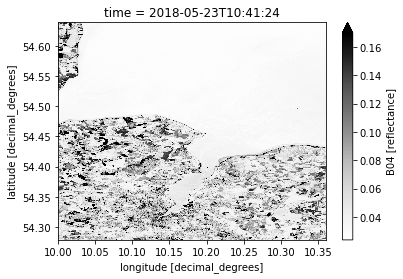

In [208]:
cube.B04.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='Greys', vmax = .17)

## Sentinel-1 GRD

In [209]:
SH.band_names('S1GRD')

['VV', 'VH', 'HH', 'HV']

In [215]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [216]:
spatial_res = 0.00018 

In [217]:
cube_config = CubeConfig(dataset_name='S1GRD',
                         band_names=['VH'],
                         chunk_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

In [218]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 3072, time: 40)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 10.55 10.55 10.55 10.55
  * time       (time) datetime64[ns] 2019-05-15 2019-05-17 ... 2019-08-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH         (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2019-11-07T16:57:50.745235
    processing_level:          L1B
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-02T00:00:00+00:00
    time_coverage_duration:    P80DT0H0M0S
    time_c

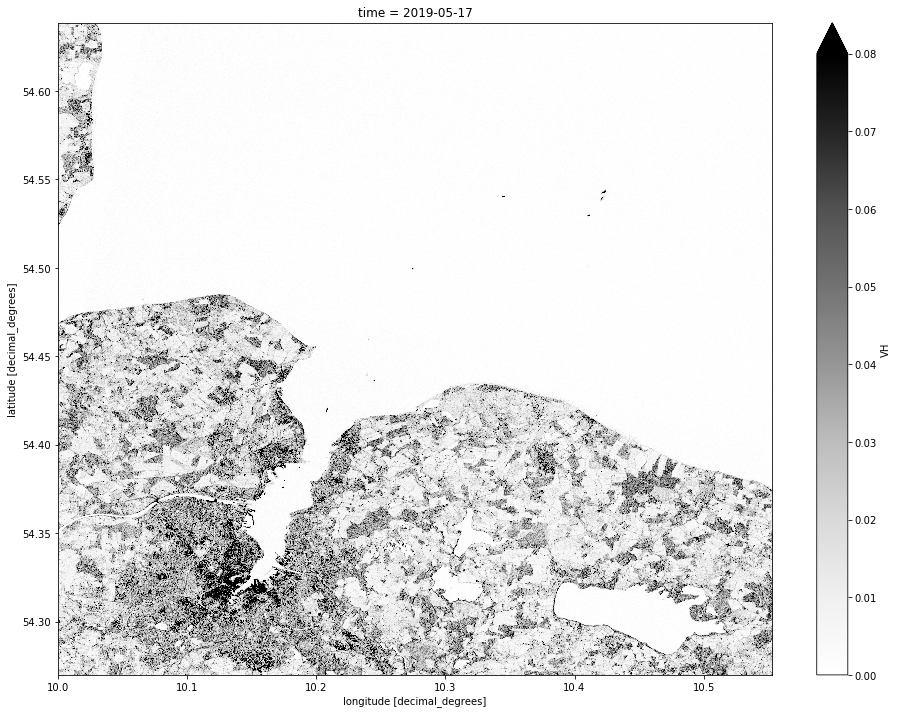

In [219]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

In [ ]:
SH.dataset_names

## Digital Elevation Model

In [220]:
SH.band_names('DEM')

['DEM']

In [221]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.40  # degree

bbox = x1, y1, x2, y2

In [222]:
spatial_res = 0.0002

In [223]:
cube_config = CubeConfig(dataset_name='DEM',
                         band_names=['DEM'],
                         chunk_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='100D')  

In [224]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 1024, lon: 2560, time: 1)
Coordinates:
  * lat        (lat) float64 54.47 54.47 54.47 54.47 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 10.51 10.51 10.51 10.51
  * time       (time) datetime64[ns] 2019-07-03
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    DEM        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     DEM Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2019-11-07T17:01:08.406325
    processing_level:          None
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-22T00:00:00+00:00
    time_coverage_duration:    P100DT0H0M0S
    time_coverage_resolution:  P100DT0

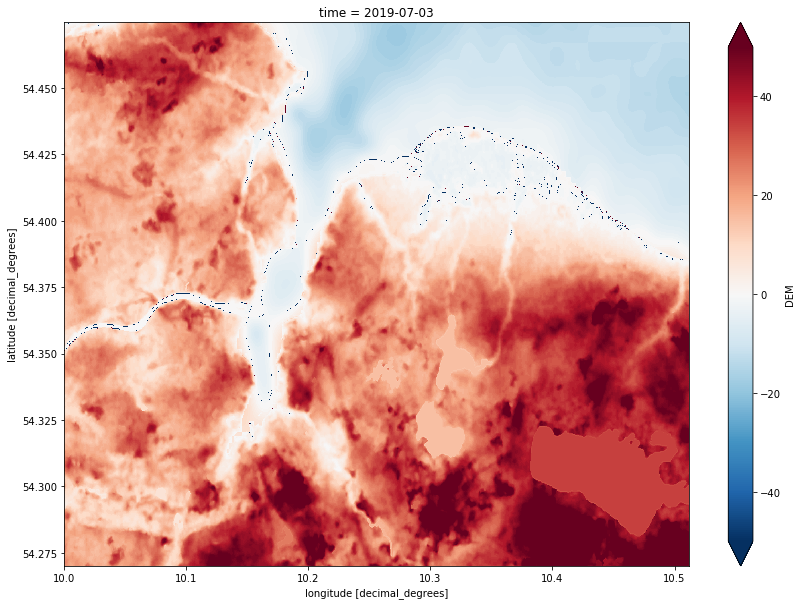

In [225]:
cube.DEM.isel(time=0).plot.imshow(vmin = -50, figsize = [14,10])